# Projeto - Análise das UPP,  Evolução Mensal no Rio de Janeiro (Analytica UFRJ)

* Base de dados:
    * Estatísticas de segurança: série histórica mensal por área de Unidade de Polícia Pacificadora (01/2007 a 06/2020)
    * [ISP - Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html)
    * [Base dos Dados](https://basedosdados.org/dataset/estatisticas-de-seguranca-por-delegacia-de-policia-rj)


* Sumário
    * Introdução ao Problema
    * Questionamentos iniciais
        * A UPP melhorou os índices de seguranças nesses locais?
        * Em caso de melhora ou piora, quais foram os locais que tiveram numeros expressivos?
        * Quais UPP's foram casos de sucesso e quais foram casos de fracasso?
    * Macro
        * Análise histórica dos dados brutos
        * Análise histórica roubo, furto, hom_doloso, armas_apreendidas
    * Meso
        * Análise histórica dos dados brutos por Zona
        * Análise histórica dos dados de roubo, furto, hom_doloso, armas_apreendidas por Zona
    * Micro
        * Quais UPP's tiveram os maiores e menores números absolutos de criminalidade?
        * Quais UPP's tiveram uma evolução para melhor e pior nos números absolutos de criminalidade?
        * Quais UPP's tiveram uma evolução para melhor e pior nos números de roubo, furto, hom_doloso, armas_apreendidas?
    * Predições
        * Clusterização dos dados de roubo e furto
        * Clusterização dos dados de roubo de carga
    * Dashboard Interativo
        * Geração de relatórios automáticos utilizando fatores para filtragem dos dados


In [1]:
import pandas as pd
import numpy as np

In [64]:
base = pd.read_csv('UppEvolucaoMensalDeTitulos.csv', sep=';',encoding='ISO-8859-1')

In [65]:
base.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

In [66]:
base.sample(10)

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
5843,30,Manguinhos,2019,10,1,0,0,2,0,0,...,3,0,1,0,0,0,0,0,0,25
5496,25,Fé / Sereno,2019,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,6
1688,17,Mangueira,2010,9,0,0,0,0,0,6,...,0,1,1,5,0,0,0,0,0,22
3026,25,Fé / Sereno,2013,8,0,0,0,0,0,1,...,0,0,3,1,0,0,0,0,0,14
6147,30,Manguinhos,2020,6,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,9
5614,29,Jacarezinho,2019,4,0,0,0,0,0,3,...,0,1,5,5,1,0,0,0,0,63
1583,26,Parque Proletário,2010,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
506,13,São João / Matriz / Queto,2008,2,0,0,0,0,0,5,...,3,0,1,1,0,0,0,0,0,12
2739,4,Chapéu Mangueira / Babilônia,2013,1,0,0,0,0,0,3,...,0,0,1,2,2,0,0,0,0,12
4722,11,Salgueiro,2017,5,0,0,0,1,4,0,...,2,2,2,0,0,0,0,0,0,9


In [67]:
base.shape

(6384, 42)

In [68]:
base.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

### Criação da Coluna Ocorrência_AR e Ocorrência_BR

* Ocorrência_BR - Ocorrências de baixo risco: Som alto, briga entre pessoas e etc
* Ocorrência_AR - Ocorrências de alto risco: Roubo, tráfico, morte e etc.

In [69]:
base['ocorrencia_ar'] = base.transpose().drop('cod_upp').drop('upp').drop('ano').drop('mes').drop('registro_ocorrencias').sum()
base.rename(columns = {'registro_ocorrencias': 'ocorrencia_br' } , inplace = True)
base.astype({'ocorrencia_ar':'int64'})

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,ocorrencia_br,ocorrencia_ar
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,11,8
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,2,11,7,2,0,0,0,0,98,136
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,19,27
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,2,0,1,0,0,0,0,0,9,8
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,1,1,0,0,0,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,34,Arará / Mandela,2020,12,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,9,9
6380,35,Lins,2020,12,0,0,0,0,0,2,...,0,0,3,0,0,0,0,0,23,17
6381,36,Camarista Méier,2020,12,0,0,0,0,1,2,...,0,0,1,2,0,0,0,0,32,24
6382,37,Mangueirinha,2020,12,1,0,0,0,0,5,...,1,1,4,0,0,0,0,0,43,45


In [70]:
base

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,ocorrencia_br,ocorrencia_ar
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,11,8
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,2,11,7,2,0,0,0,0,98,136
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,19,27
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,2,0,1,0,0,0,0,0,9,8
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,1,1,0,0,0,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,34,Arará / Mandela,2020,12,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,9,9
6380,35,Lins,2020,12,0,0,0,0,0,2,...,0,0,3,0,0,0,0,0,23,17
6381,36,Camarista Méier,2020,12,0,0,0,0,1,2,...,0,0,1,2,0,0,0,0,32,24
6382,37,Mangueirinha,2020,12,1,0,0,0,0,5,...,1,1,4,0,0,0,0,0,43,45


# Análise Macro

* Análise histórica dos dados brutos
* Análise histórica roubo, furto, hom_doloso, armas_apreendidas e ameças.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Análise histórica de Roubo, Furto, Homicídio Doloso, Armas Apreendidas e Ameaças.

In [23]:
sns.set_theme(style='whitegrid')
sns.set_palette("Dark2_r")

In [73]:
ocorrenciasar = base.groupby('ano')['ocorrencia_ar'].sum()
ocorrenciasbr = base.groupby('ano')['ocorrencia_br'].sum()
total_roubos = base.groupby('ano')['total_roubos'].sum()
total_furtos = base.groupby('ano')['total_furtos'].sum()
armas_apreendidas = base.groupby('ano')['armas_apreendidas'].sum()
ameaca = base.groupby('ano')['ameaca'].sum()
hom_doloso = base.groupby('ano')['hom_doloso'].sum()
ano = base['ano'].unique()

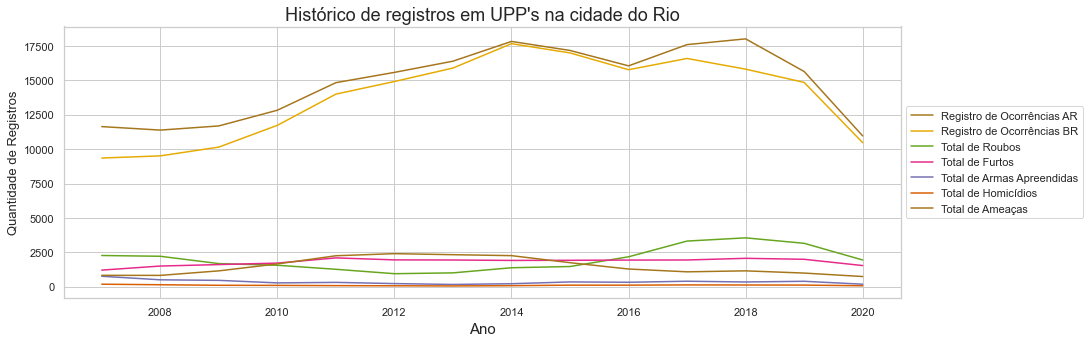

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
title = "Histórico de registros em UPP's na cidade do Rio"
ax.set_title(title, fontsize = 18)
ax.plot(ano, ocorrenciasar, label = 'Registro de Ocorrências AR')
ax.plot(ano, ocorrenciasbr, label = 'Registro de Ocorrências BR')
ax.plot(ano, total_roubos, label = 'Total de Roubos')
ax.plot(ano, total_furtos, label = 'Total de Furtos')
ax.plot(ano, armas_apreendidas, label = 'Total de Armas Apreendidas')
ax.plot(ano, hom_doloso, label = 'Total de Homicídios')
ax.plot(ano, ameaca, label = 'Total de Ameaças')
ax.set_ylabel('Quantidade de Registros', fontsize = 13)
ax.set_xlabel('Ano', fontsize = 15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

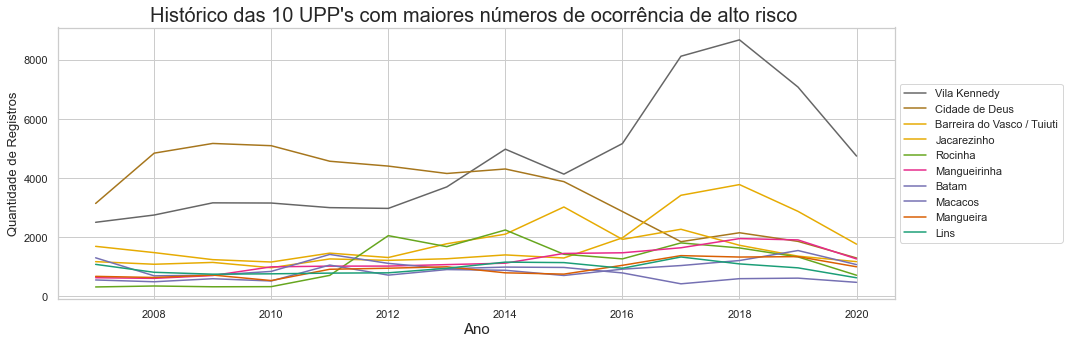

In [40]:
list_upps_maiores_ocorrencias = base.groupby('upp')['ocorrencia_ar'].sum().sort_values(ascending = False).index[:10].to_list()
upp_ano_ocorrencia = pd.DataFrame(base[base['upp'].isin(list_upps_maiores_ocorrencias)].groupby(['ano', 'upp'])['ocorrencia_ar'].sum()).reset_index().sort_values(by='ocorrencia_ar', ascending = False)
upp_ano_ocorrencia

#####

plt.figure(figsize=(15, 5))
plt.title("Histórico das 10 UPP's com maiores números de ocorrência de alto risco ", fontsize = (20), loc='center')
g = sns.lineplot(x='ano', y='ocorrencia_ar', hue='upp' , data = upp_ano_ocorrencia, palette='Dark2_r')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_ylabel('Quantidade de Registros',fontsize = 13)
g.set_xlabel('Ano', fontsize = 15);

### Médias de Ocorrências de Alto Risco e Baixo Risco por ano

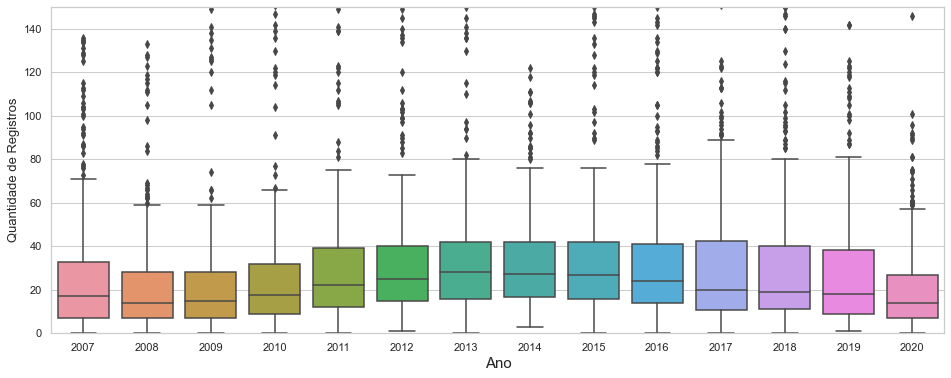

In [181]:
plt.figure(figsize=(16, 6))
plt.ylim(top=150)
g = sns.boxplot(x="ano", y="ocorrencia_ar",data=base)
g.set_ylabel('Quantidade de Registros', fontsize = 13)
g.set_xlabel('Ano', fontsize = 15);

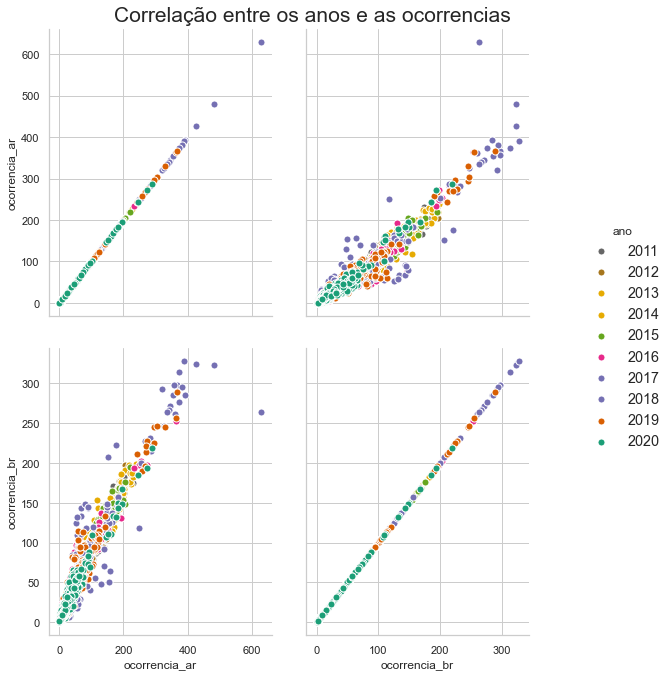

In [179]:
g = sns.PairGrid(base[base['ano']>2010][['ano', 'ocorrencia_ar', 'ocorrencia_br']] , hue="ano",palette="Dark2_r")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend(fontsize='large')
g.fig.suptitle('Correlação entre os anos e as ocorrencias', fontsize=21 , verticalalignment= 'center' , horizontalalignment = 'center')
g.fig.set_size_inches(10,10);